# Estimating Probabilities from Data


Tutorial is based on 
1. [CORNELL CS4780 "Machine Learning for Intelligent Systems"](https://www.youtube.com/watch?v=VDK0nkjFh5U&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=9) by Killian Weinberger.

## Estimating Probabilities from Data


$$ \mathbb P( \mathcal D ) $$


### Observation $$ \mathcal D = H, T, T, H, H, H, T, T, T, T$$
We have n=10 independent events/observations. 
Each observation is a binomial observation, i.e., can take one of two different values, e.g. 0/1, yes/no, H/T.

### What is the probability of observing H ? $$ \\ \mathbb P( \mathcal D ) \approx \frac{n_H}{n_H + n_T}$$



### MLE: $$ \\ \mathbb P( \mathcal D; \Theta)$$

$\Theta$ denotes the probability of observing $H$. 
Our goal is to find $\Theta$ that maximize the probability of observing this data $D$.

$$ \Theta = argmax_\Theta \mathbb P (\mathcal D; \Theta )$$

also written as

$$ \Theta = argmax_\Theta \mathbb P_\Theta  (\mathcal D)$$

### Binomial Distribution: $$ \mathbb P( \mathcal D; \Theta) = {n_H + n_T \choose n_H} \Theta^{n_H} (1- \Theta) ^{n_T}$$
where 
+ $n_H$ and $n_T$ denote the number of observed heads and tails, respectively
+ $\Theta \in [0,1]$

### Compute MLE for $$ \mathbb P( \mathcal D = H, T, T, H, H, H, T, T, T, T; \Theta=.5)$$

$$ {4 + 6 \choose 4} 0.5^4 (1-0.5)^6 $$

In [1]:
import math
math.comb(4+6,4) * 0.5**4 *(1-0.5)**6

0.205078125

## How to solve this MLE problem


### 1. $$ \Theta = argmax_\Theta \mathbb P (\mathcal D; \Theta )$$


### 2. $$ = argmax_\Theta {n_H + n_T \choose n_H} \Theta^{n_H} (1- \Theta) ^{n_T}$$


### 3. $$ = argmax_\Theta \; log\Big( {n_H + n_T \choose n_H} \Theta^{n_H} (1- \Theta) ^{n_T} \Big) $$


### 4. $$ = log{n_H + n_T \choose n_H} + log(\Theta^{n_H}) + log((1- \Theta) ^{n_T})$$
Logarithm of a Product.


### 5. $$ = log{n_H + n_T \choose n_H} + n_H log\Theta + n_T log(1- \Theta)$$
Logarithm of a Power.


### 6. Take the derivative of 5 w.r.t. $\Theta$ and set it to 0.

+ The first term $log{n_H + n_T \choose n_H}$ is gone
+ The second term $\frac{n_H}{\Theta}$ due to logarithmic derivative
+ The third term $-\frac{n_T}{1-\Theta}$ due to logarithmic derivative

#### 6.1 $$ \frac{n_H}{\Theta} - \frac{n_T}{1-\Theta} = 0$$

#### 6.2 $$ \frac{n_H}{\Theta} = \frac{n_T}{1-\Theta}$$

#### 6.3 Solution:$$ \Theta = \frac{n_H}{n_H + n_T}$$

## How to solve this MAP problem


### 1. $$ \Theta = argmax_\Theta \mathbb P (\mathcal D | \Theta )$$

In MLE, we aim to find $\Theta = argmax_\Theta \mathbb P (\mathcal D ;\Theta )$, i.e., find $\Theta$ that maximize the probability of observing $\mathcal D$. In MAP, we assume that $\Theta$ is a random variable


### 2. $$ \Theta = argmax_\Theta \frac{\mathbb P(\Theta | \mathcal D) \; \mathbb P(\mathcal D)}{\mathbb P(\Theta)}$$
Applying Bayes rule.


### 3. $$ \mathbb P(\Theta | \mathcal D) \propto \; 
\mathbb P(\mathcal D | \Theta) \mathbb P(\mathcal D)$$

### 3.1 $$ \Theta = argmax_\Theta 
\mathbb P(\mathcal D | \Theta) \mathbb P(\mathcal D)$$
Applying Bayes rule. Our goal is to maximize the conditional probability of observing $\Theta$ given $\mathcal D$.


### 4 $$ \Theta = argmax_\Theta 
log( \mathbb P(\mathcal D | \Theta)) \mathbb P(\mathcal D))$$


### 5 $$ \Theta = argmax_\Theta 
log( \mathbb P(\mathcal D | \Theta)) + log(\mathbb P(\mathcal D))$$


### 5.1. $$ \mathbb P (\Theta)^\text{Beta} =\frac{\Theta^{\alpha -1} (1-\Theta)^{\beta-1}}{B(\alpha,\beta)}$$
**This is beta distribution** and returns values between 0 and 1
Value between 0 and 1.

### 6.1. $$ \mathbb P(\mathcal D | \Theta) = {n_H + n_T \choose n_H} \Theta^{n_H} (1- \Theta) ^{n_T}$$
where 
+ $n_H$ and $n_T$ denote the number of observed heads and tails, respectively
+ $\Theta \in [0,1]$

### 7. $$ = {n_H + n_T \choose n_H} \Theta^{n_H} (1- \Theta) ^{n_T}  \cdot  \Big( \frac{\Theta^{\alpha -1} (1-\Theta)^{\beta-1}}{B(\alpha,\beta)}\Big)$$

**Puting 5.1 and 6.1 in the step 4**


### 8. $$ =  {n_H + n_T \choose n_H} \Theta^{n_H} (1- \Theta) ^{n_T} \Theta^{\alpha -1} (1-\Theta)^{\beta-1}$$

**Remove the constant**

### 9. $$ \Theta = argmax_\Theta  {n_H + n_T \choose n_H} \Theta^{n_H + \alpha -1} (1- \Theta) ^{n_T + \beta-1} $$

**Group the terms through using Product rules of exponents**

### 10. $$ log\Big({n_H + n_T \choose n_H}\Big) + log\Big(\Theta^{n_H + \alpha -1}\Big) + log\Big((1- \Theta) ^{n_T + \beta-1} \Big) $$

**Take the log and distribute it over product**

### 11. $$ log\Big({n_H + n_T \choose n_H}\Big) + \Big((n_H + \alpha -1) log\Theta\Big) + \Big((n_T + \beta-1) log(1- \Theta) \Big) $$

**Apply the power rule of logarithm**

### 12. Take the derivative of 11 w.r.t. $\Theta$ and set it to 0.

+ The first term $log{n_H + n_T \choose n_H}$ is gone
+ The second term $\frac{n_H + \alpha -1 }{\Theta}$ due to the logarithmic derivative
+ The third term $-\frac{n_T+\beta -1 }{1-\Theta}$ due to the logarithmic derivative



#### 12.1 $$ \frac{n_H + \alpha -1 }{\Theta} -\frac{n_T+\beta -1 }{1-\Theta} = 0$$

#### 12.2 $$ \frac{n_H + \alpha -1 }{\Theta} =\frac{n_T+\beta -1 }{1-\Theta}$$

#### 12.3 $$ \Theta= \frac{n_H + \alpha -1}{n_H + n_T + \alpha + \beta-2}$$

# Implementation of MLE Estimation

In [2]:
from collections import Counter
import random
import matplotlib.pyplot as plt
import functools

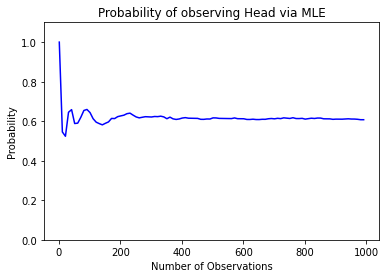

In [3]:
events = ['T', 'H']
true_prob = [0.4, 0.6]
num_of_samples=1000
D=random.choices(population=events, 
               weights=true_prob,
               k=num_of_samples)

def mle(dataset):
    counter=Counter(dataset)
    if 'H' in counter:
        return counter['H']/len(dataset)
    else:
        return 0.0
def plotting(estimator,dataset,title_info=''):
    x_axis_values=[]
    y_axis_values=[]
    for x in range(1,len(dataset),10):
        estimate=estimator(dataset[:x])
        x_axis_values.append(x)
        y_axis_values.append(estimate)
        
    plt.plot(x_axis_values,y_axis_values,c='b')
    plt.title(f'Probability of observing Head via {title_info}')
    plt.ylabel("Probability")
    plt.xlabel("Number of Observations")
    plt.ylim(ymax = 1.1, ymin = 0.0)
    plt.show()
plotting(mle,D,'MLE')

# Implementation of MAP Estimation

In [4]:
def map_estimator(dataset,alpha=1,beta=1):
    counter=Counter(dataset)
    if 'H' in counter:
        return (counter['H']+ alpha-1)/(len(dataset)+alpha+beta-2)
    else:
        return 0.0

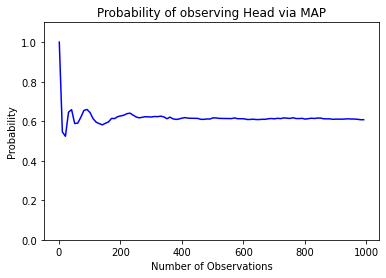

In [5]:
plotting(map_estimator,D,'MAP') # Same as MLE

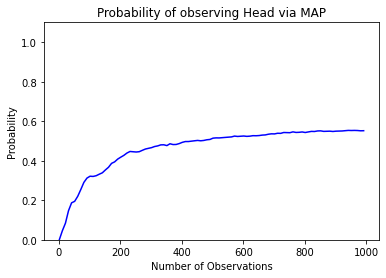

In [6]:
plotting(functools.partial(map_estimator, alpha=0,beta=100),D,'MAP')